
# CREDIT CARD FRUAD DETECTION

### Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Inspiration

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


In [155]:
# from pyforest import*
# lazy_imports()

In [156]:
#import libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score

plt.style.use('ggplot')

In [49]:
plt.style.use('ggplot')

<IPython.core.display.Javascript object>

In [50]:
data = pd.read_csv("creditcard.csv")

<IPython.core.display.Javascript object>

In [51]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [52]:
data.shape

(284807, 31)

In [53]:
df=data.loc[:, ['Time','Amount','Class']]

In [157]:
df.describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [158]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

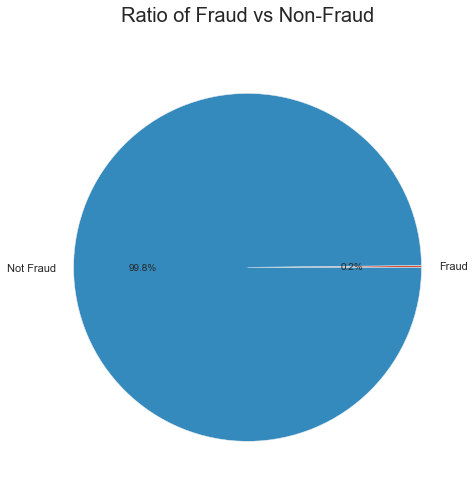

In [55]:
fraud = len(df[df['Class']==1])
notfraud = len(df[df['Class']==0])

# Data to Plot
labels = 'Fraud','Not Fraud'
sizes = [fraud,notfraud]

#Plot
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=0)
plt.title('Ratio of Fraud vs Non-Fraud\n', fontsize=20)
sns.set_context("paper",font_scale=2)

In [57]:
df.isna().sum()

Time      0
Amount    0
Class     0
dtype: int64

In [58]:
df.dtypes

Time      float64
Amount    float64
Class       int64
dtype: object

# Visualizations

# Bivariate Data Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

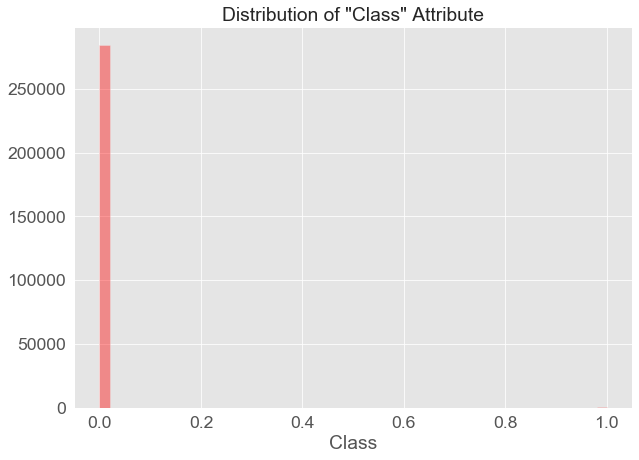

In [59]:
plt.figure(figsize=(10,7))
plt.title('Distribution of "Class" Attribute')

sns.distplot(df['Class'],color='red',kde=False);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

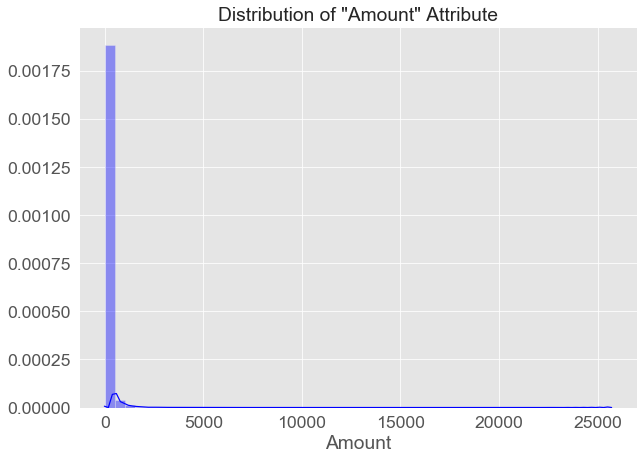

In [60]:
plt.figure(figsize=(10,7))
plt.title('Distribution of "Amount" Attribute')

sns.distplot(df['Amount'],color='blue');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

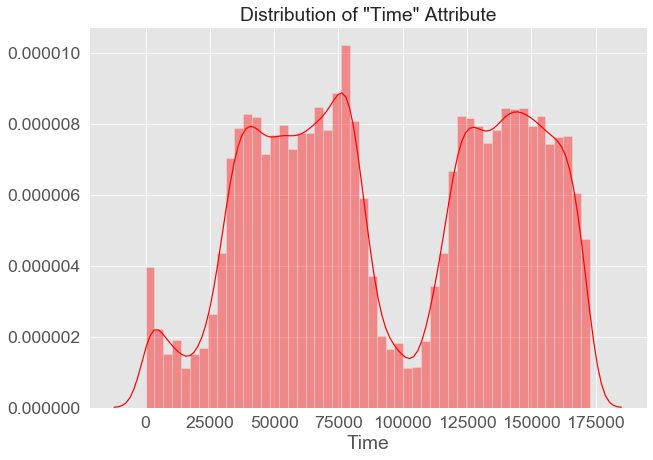

In [61]:
plt.figure(figsize=(10,7))
plt.title('Distribution of "Time" Attribute')

sns.distplot(df['Time'],color='red',kde=True);

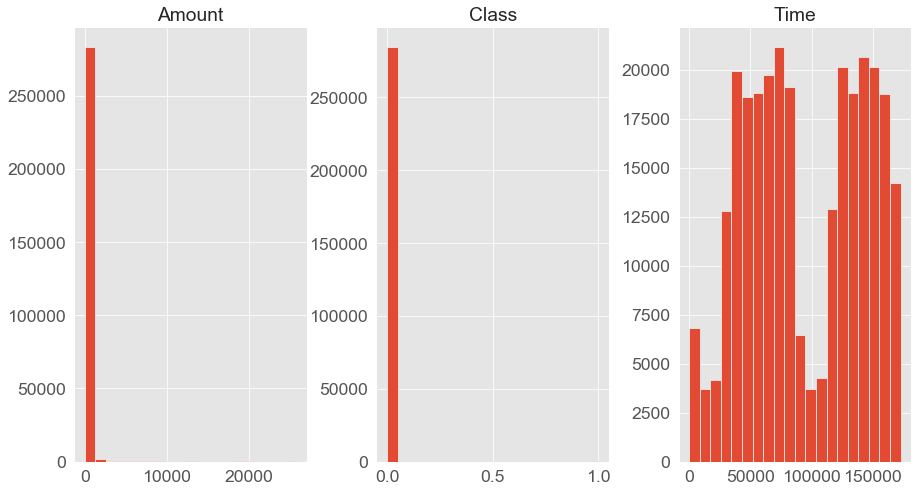

In [62]:
df.hist(bins=20, figsize=(15,8),layout=(1,3));

In [63]:
df.corr()

,Time,Amount,Class
Time,1.000000,-0.010596,-0.012323
Amount,-0.010596,1.000000,0.005632
Class,-0.012323,0.005632,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

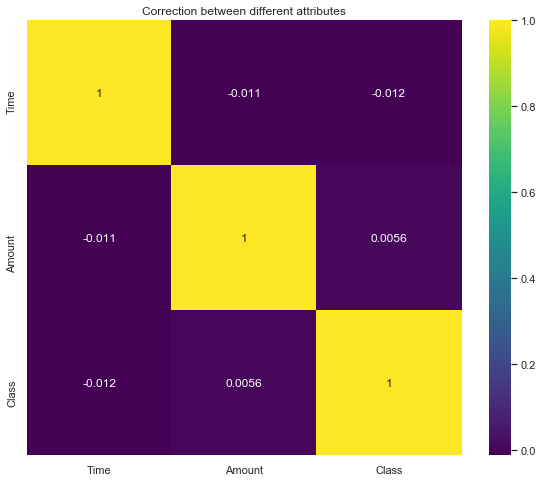

In [64]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Correction between different attributes')
plt.show()

In [65]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777386e-12,-2.119585e-12,-1.724017e-13,-3.472870e-12,-1.306592e-13,-1.127393e-13,2.115132e-12,3.081639e-14,...,-3.276409e-12,2.281843e-12,-2.971523e-12,-1.029987e-12,1.146728e-12,1.835367e-12,7.624885e-12,-9.774773e-13,-0.227709,-0.101347
V2,-0.010593,3.777386e-12,1.000000e+00,2.326821e-12,-2.314711e-12,-1.832637e-12,9.439633e-13,5.403061e-12,2.153414e-14,3.239499e-13,...,2.280624e-12,-2.545709e-13,-4.855967e-12,6.430858e-13,-9.427890e-13,-4.128661e-13,-9.857578e-13,2.525320e-12,-0.531409,0.091289
V3,-0.419618,-2.119585e-12,2.326821e-12,1.000000e+00,2.036710e-13,-4.031527e-12,-1.582965e-13,3.404521e-12,-1.271766e-12,-6.819934e-13,...,6.735960e-13,-8.922035e-13,4.146836e-12,3.408174e-12,5.718362e-13,-2.576520e-12,-5.041949e-12,5.188994e-12,-0.210880,-0.192961
V4,-0.105260,-1.724017e-13,-2.314711e-12,2.036710e-13,1.000000e+00,-2.549916e-13,1.083580e-12,8.130086e-13,7.338233e-13,-7.138427e-13,...,-2.696261e-12,4.343923e-13,-4.161184e-12,-2.368673e-12,1.619552e-12,-3.045481e-13,-1.455904e-12,-2.832333e-12,0.098732,0.133447
V5,0.173072,-3.472870e-12,-1.832637e-12,-4.031527e-12,-2.549916e-13,1.000000e+00,-6.988066e-14,1.573950e-11,-2.038440e-12,-1.000460e-12,...,-1.752003e-12,7.097727e-13,3.616455e-12,-2.808758e-13,1.452161e-12,-1.895655e-13,-2.124508e-12,1.010195e-11,-0.386356,-0.094974
V6,-0.063016,-1.306592e-13,9.439633e-13,-1.582965e-13,1.083580e-12,-6.988066e-14,1.000000e+00,-2.798863e-12,-5.446449e-13,2.036992e-12,...,1.476734e-12,-1.145022e-12,-1.527599e-12,1.552011e-12,-2.723515e-12,3.351155e-12,1.480833e-12,-6.072099e-13,0.215981,-0.043643
V7,0.084714,-1.127393e-13,5.403061e-12,3.404521e-12,8.130086e-13,1.573950e-11,-2.798863e-12,1.000000e+00,5.528624e-12,5.086017e-13,...,2.787549e-12,-8.133708e-13,-4.292216e-12,-2.553519e-12,-7.410166e-13,-4.475969e-12,-1.328689e-11,2.955517e-13,0.397311,-0.187257
V8,-0.036949,2.115132e-12,2.153414e-14,-1.271766e-12,7.338233e-13,-2.038440e-12,-5.446449e-13,5.528624e-12,1.000000e+00,-2.243351e-12,...,-4.022297e-12,-2.679598e-12,9.013096e-13,-1.074225e-12,-3.268920e-12,1.043929e-12,-3.500241e-12,1.866554e-12,-0.103079,0.019875
V9,-0.008660,3.081639e-14,3.239499e-13,-6.819934e-13,-7.138427e-13,-1.000460e-12,2.036992e-12,5.086017e-13,-2.243351e-12,1.000000e+00,...,3.040341e-12,-7.470414e-13,-1.011172e-12,8.577402e-13,-1.589032e-12,-7.738355e-13,2.429466e-12,-1.406037e-12,-0.044246,-0.097733


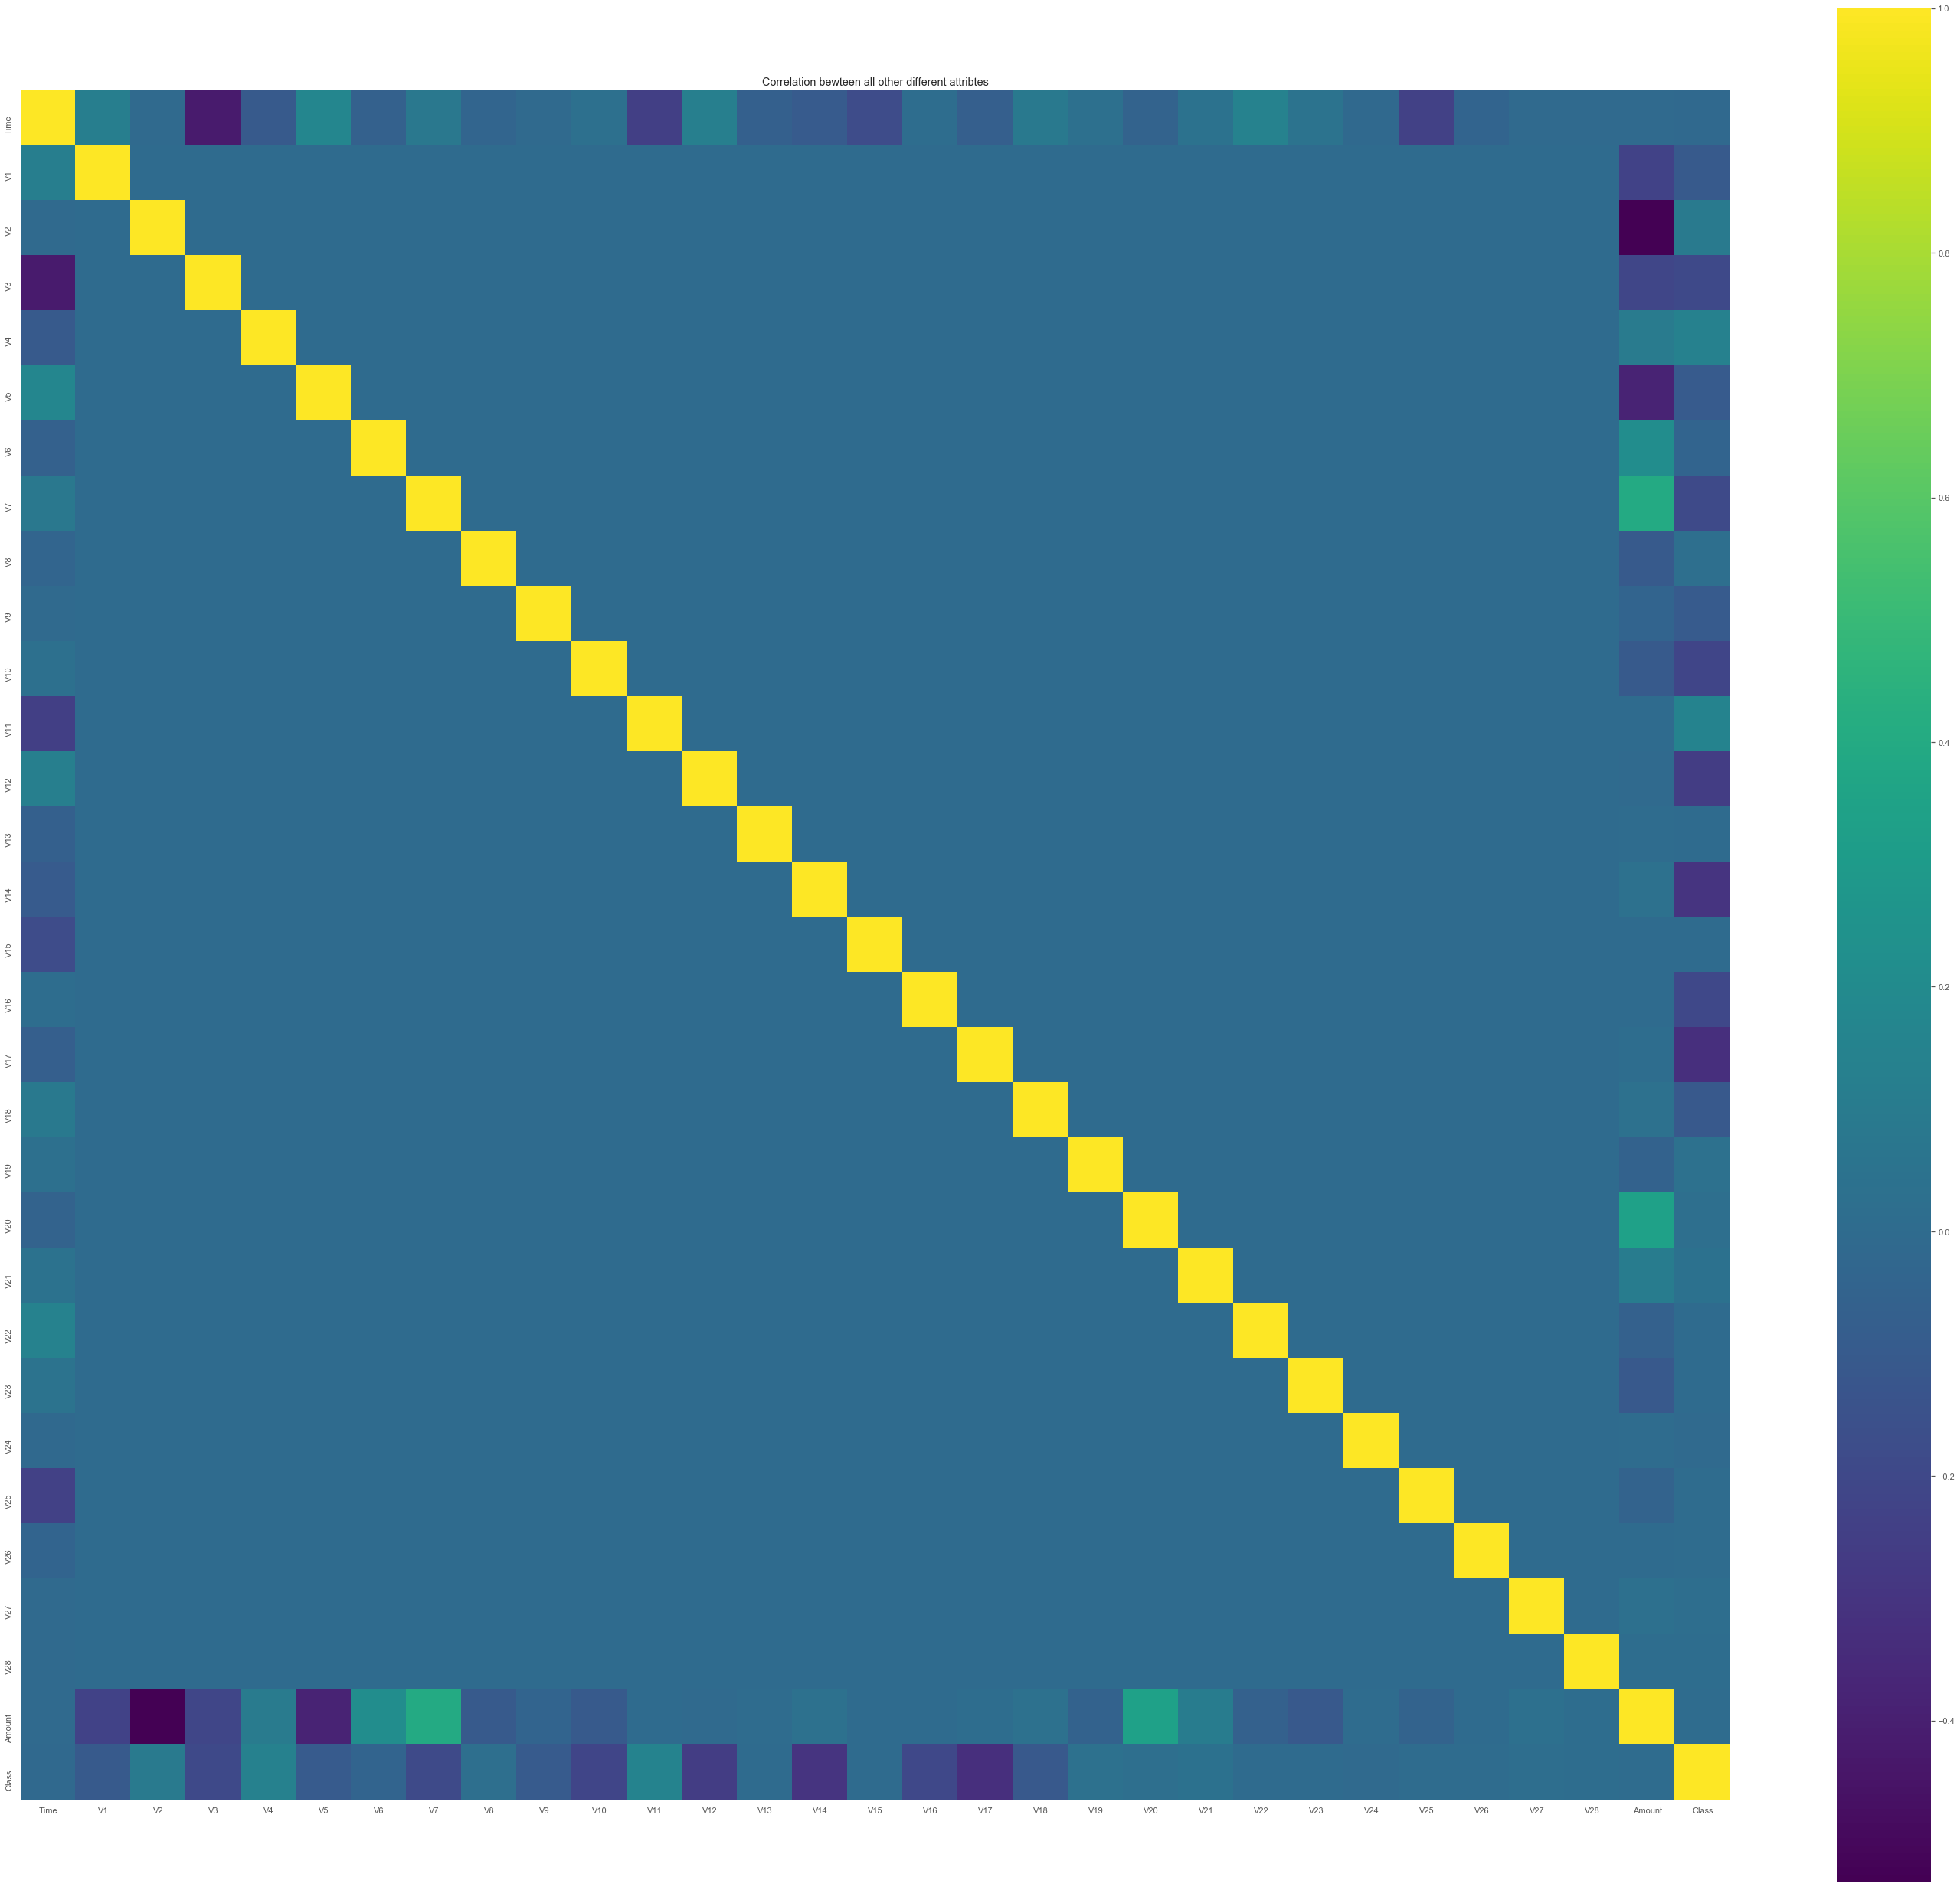

In [159]:
plt.figure(figsize=(50,45))

sns.heatmap(data.corr(), vmax=1,square=True,cmap='viridis')
plt.title('Correlation bewteen all other different attribtes')
plt.show()

D:\installations\Anaconda\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\installations\Anaconda\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


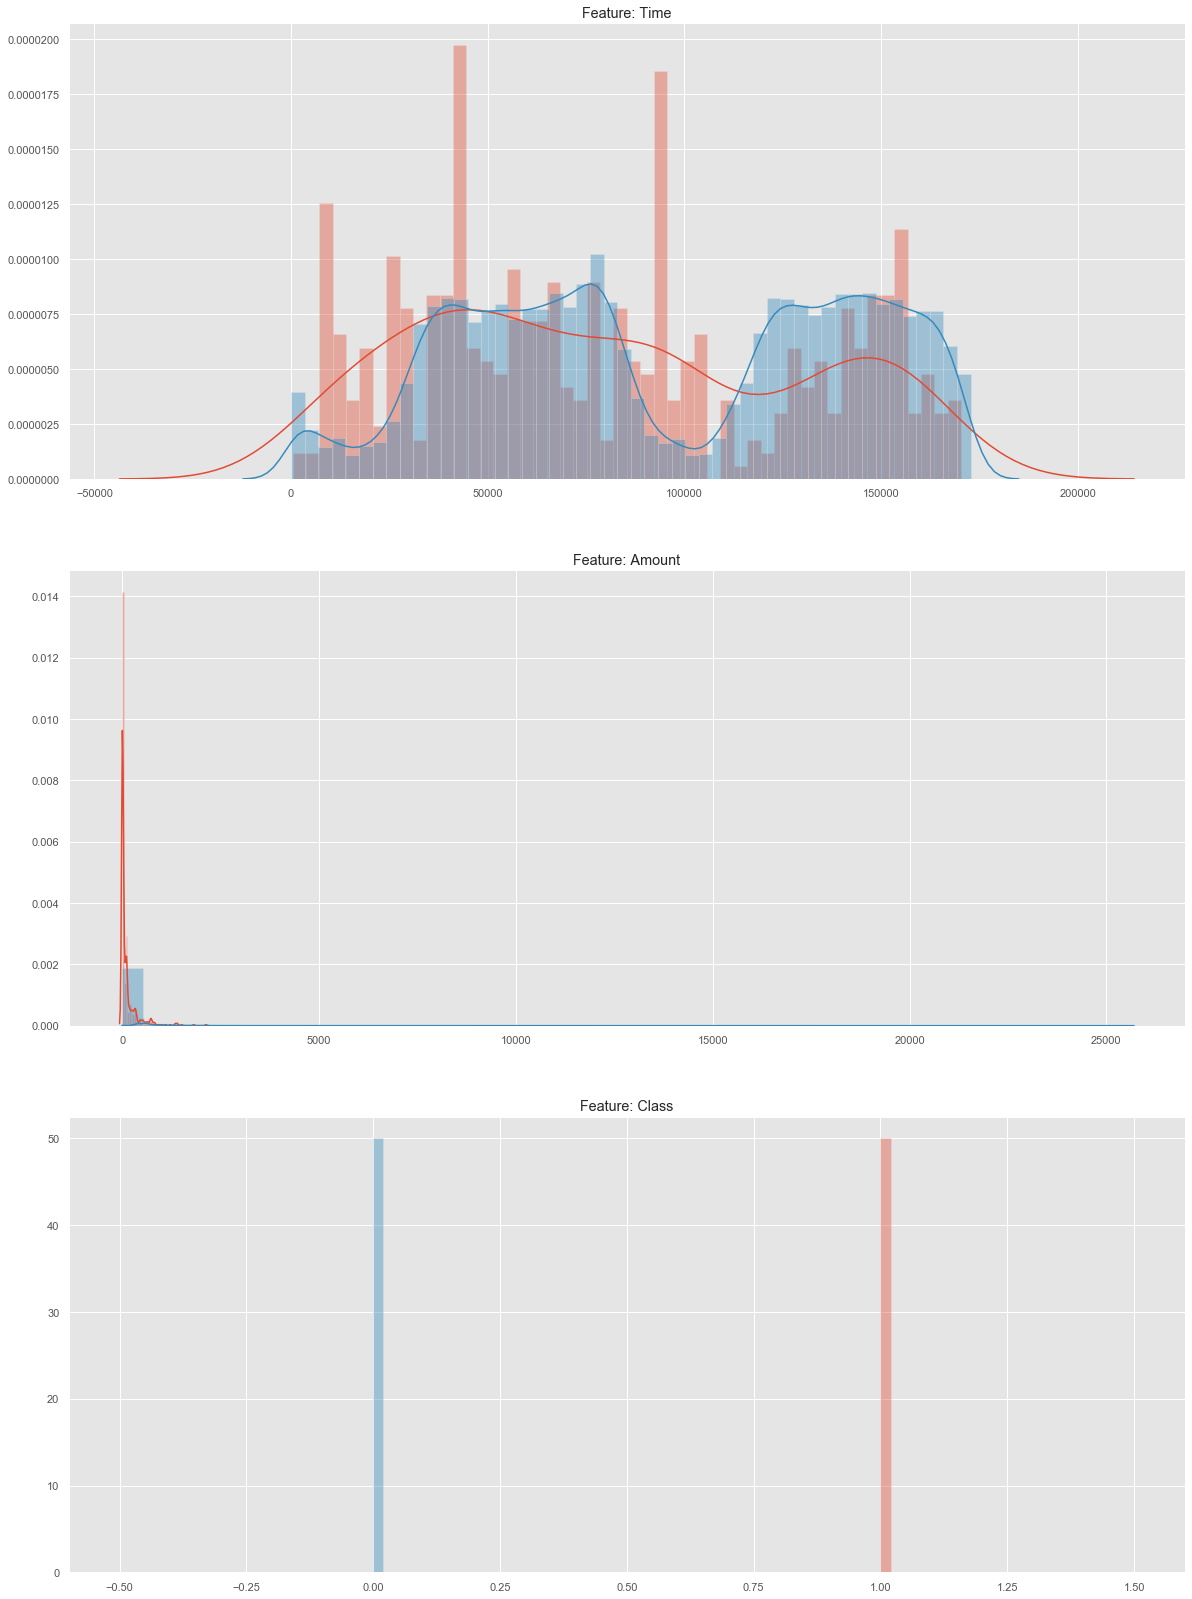

In [160]:
plt.figure(figsize=(20,30*10))
import matplotlib.gridspec as gridspec
features = df.iloc[:,0:30].columns
gs = gridspec.GridSpec(30, 1)
for i, feature in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feature][df.Class == 1], bins=50)
    sns.distplot(df[feature][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(feature))
plt.show()

# Model Building

In [67]:
X = data.drop('Class',axis=1)
y= data['Class']

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=2)

<IPython.core.display.Javascript object>

In [69]:
# concatenate out training data back together
X = pd.concat([X_train,y_train],axis=1)
X.head()

<IPython.core.display.Javascript object>

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2426,1998.0,-1.493109,1.504546,1.218875,0.741269,0.590354,0.542055,1.002090,-0.341592,1.036933,...,-0.334599,0.256465,-0.180672,-0.318639,0.096885,-0.288423,0.326771,-0.122804,5.99,0
273831,165717.0,1.882512,-1.246004,-1.261235,-2.214129,-0.652094,-0.455959,-0.548944,-0.031293,2.436652,...,0.290441,0.831404,-0.157292,-1.007042,0.088092,-0.711502,0.049068,-0.037816,120.77,0
111538,72264.0,-2.616714,-1.670963,1.088904,0.562648,1.926064,-0.106636,-0.264908,0.587695,0.031149,...,-0.287822,-0.063602,2.187033,-0.769500,-0.073056,0.260426,0.475727,-0.153728,1.79,0
252280,155735.0,1.224944,-1.472840,-0.858202,0.569373,-0.740161,-0.142346,0.094122,-0.103440,0.781506,...,0.049060,-0.579501,-0.010561,-0.340668,-0.533698,-0.707276,-0.040171,0.024283,392.60,0
281542,170252.0,-1.791497,-0.051034,3.067529,3.683853,-1.830843,2.302404,0.733966,0.340065,0.162149,...,-0.023135,0.511261,-0.344378,0.066365,0.377551,0.283631,0.094240,0.074318,383.69,0


# Using Dummy Classifier to verify the inbalance data output

In [70]:
from sklearn.dummy import DummyClassifier

In [71]:
dummy = DummyClassifier(strategy='prior')

In [72]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='prior')

In [73]:
dummy_pred = dummy.predict(X_test)

In [74]:
dummy_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
from sklearn.metrics import precision_score, accuracy_score,recall_score,precision_recall_curve,f1_score,confusion_matrix

In [76]:
# Checking unique labels
print('Unique predicted labels: ',np.unique(dummy_pred))

# Checking Accuracy
print('Test score: ', accuracy_score(y_test,dummy_pred))

<IPython.core.display.Javascript object>

Unique predicted labels:  [0]
Test score:  0.9984317030066828


# Upsampling

In [77]:
# separate minority and majority classes
from sklearn.utils import resample

not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                           replace=True, # Sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results
#combine majority and upsample minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

<IPython.core.display.Javascript object>

1    199006
0    199006
Name: Class, dtype: int64

# Logistic Regression witt balanced dataset

In [78]:
from sklearn.linear_model import LogisticRegression

y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train,y_train)

upsampled_pred = upsampled.predict(X_test)

In [79]:
upsampled

LogisticRegression(solver='liblinear')

In [80]:
accuracy_score(y_test,upsampled_pred)

0.9767564341139707

In [81]:
from sklearn.metrics import classification_report

print('Logistic Regression Classification Report')

print('...'*10)
print(classification_report(y_test,upsampled_pred))

Logistic Regression Classification Report
..............................
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85309
           1       0.06      0.89      0.11       134

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [82]:
# Confusion matrix
pd.DataFrame(confusion_matrix(y_test,upsampled_pred))

<IPython.core.display.Javascript object>

,0,1
0,83338,1971
1,15,119


# DownSampling

In [83]:
# separate minority and majority classes
from sklearn.utils import resample

not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
not_fraud_downsampled = resample(not_fraud,
                           replace=True, # Sample with replacement
                          n_samples=len(fraud), # match number in majority class
                          random_state=27) # reproducible results
#combine majority and upsample minority
downsampled = pd.concat([fraud, not_fraud_downsampled])

# check new class counts
downsampled.Class.value_counts()

<IPython.core.display.Javascript object>

1    358
0    358
Name: Class, dtype: int64

In [84]:
y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

downsampled = LogisticRegression(solver='liblinear').fit(X_train,y_train)

downsampled_pred = downsampled.predict(X_test)

In [85]:
downsampled_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
accuracy_score(y_test,downsampled_pred)

0.9623023536158609

In [87]:
from sklearn.metrics import classification_report

print('Logistic Regression Classification Report')

print('...'*10)
print(classification_report(y_test,downsampled_pred))

Logistic Regression Classification Report
..............................
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85309
           1       0.04      0.92      0.07       134

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [88]:
# Confusion matrix
pd.DataFrame(confusion_matrix(y_test,downsampled_pred))

<IPython.core.display.Javascript object>

,0,1
0,82099,3210
1,11,123


# Generate Synthetic Samples

**SMOTE(SMOTE or Synthetic Minority Oversampling Technique)**

SMOTE or Synthetic Oversampling is a popular algorithm to creates sythetic observations of the minority class.

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
X = df.drop('Class',axis=1)
y = df.Class

X_train1, X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.30,random_state=20)

<IPython.core.display.Javascript object>

In [91]:
sm = SMOTE(random_state=20)
X_train1, y_train1 = sm.fit_sample(X_train1,y_train1)

In [92]:
smote = LogisticRegression(solver='liblinear').fit(X_train1,y_train1)

smote_pred = smote.predict(X_test1)

#Checking Accuracy
accuracy_score(y_test1,smote_pred)

0.8925131374132462

In [94]:
pd.DataFrame(confusion_matrix(y_test1, smote_pred))

<IPython.core.display.Javascript object>

,0,1
0,76229,9078
1,106,30


In [95]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf = RandomForestClassifier(n_estimators=10).fit(X_train,y_train)

In [98]:
rf_pred = rf.predict(X_test)

In [99]:
accuracy_score(y_test,rf_pred)

0.9687042823870885

In [100]:
from sklearn.naive_bayes import GaussianNB

In [101]:
gnb = GaussianNB().fit(X_train,y_train)

In [102]:
gnb_pred = gnb.predict(X_test)

In [103]:
accuracy_score(y_test,gnb_pred)

0.9907423662558665

In [105]:
pd.DataFrame(confusion_matrix(y_test,gnb_pred))

<IPython.core.display.Javascript object>

,0,1
0,84545,764
1,27,107


## GridSearchCV

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
sklearn.metrics.SCORERS.keys()

<IPython.core.display.Javascript object>

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [112]:
# Run CV with 5 folds (SVM)

C = [1]
gammas = [0.001,0.1]
param_grid = dict(C=C, gamma=gammas)

svm1 = svm.SVC(kernel='rbf',probability=True)
svm_grid = GridSearchCV(svm1, param_grid, cv=5, scoring='roc_auc', verbose=10,n_jobs=3)
svm_grid.fit(X_train,y_train)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    6.6s remaining:    2.8s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    7.3s finished


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=3,
             param_grid={'C': [1], 'gamma': [0.001, 0.1]}, scoring='roc_auc',
             verbose=10)

In [114]:
grid_pred = svm_grid.predict(X_test)

In [115]:
accuracy_score(y_test, grid_pred)

0.9380288613461606

In [120]:
pd.DataFrame(confusion_matrix(y_test,grid_pred))

<IPython.core.display.Javascript object>

,0,1
0,80112,5197
1,98,36


## RandomizedSearchCV

In [123]:
import sklearn.metrics as metrics

<IPython.core.display.Javascript object>

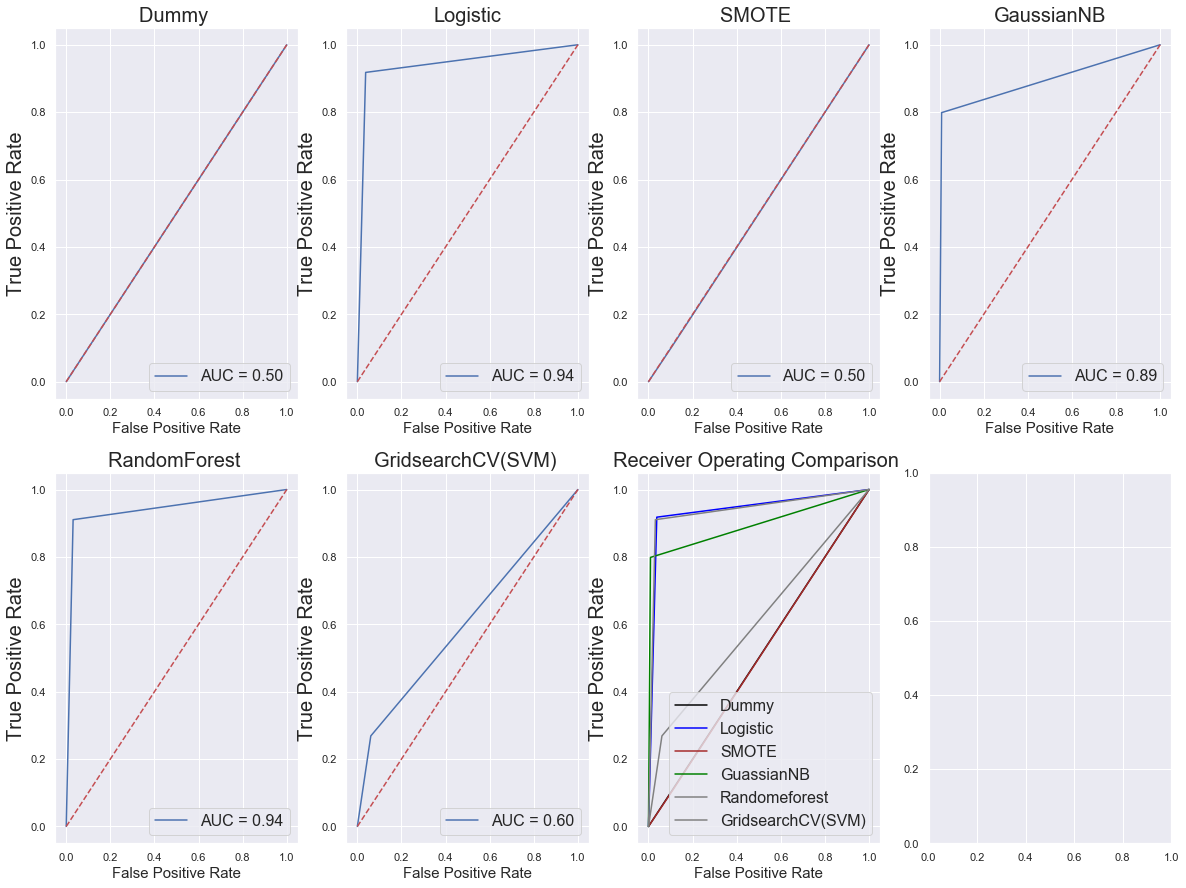

In [128]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 4, figsize = (20,15))


#----------Dummy---------


dummy_pred = dummy.predict(X_test)
fprdm, tprdm, thresholddm = metrics.roc_curve(y_test,dummy_pred)
roc_aucxgb = metrics.auc(fprdm,tprdm)

ax_arr[0,0].plot(fprdm,  tprdm, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Dummy ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})


#----------Logistics---------

downsampled_pred = downsampled.predict(X_test)
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, downsampled_pred)
roc_aucxgb = metrics.auc(fprlog, tprlog)

ax_arr[0,1].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Logistic',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


#----------SMOTE---------


smote_pred = smote.predict(X_test1)
#preds = probs[:,1]
fprsm, tprsm, thresholdsm = metrics.roc_curve(y_test, smote_pred)
roc_aucxgb = metrics.auc(fprsm, tprsm)


ax_arr[0,2].plot(fprsm, tprsm, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('SMOTE ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})



#----------GaussianNB---------

gnb_pred = gnb.predict(X_test)
#preds = probs[:,1]
fprgnb, tprgnb, thresholdgnd = metrics.roc_curve(y_test, gnb_pred)
roc_aucxgb = metrics.auc(fprgnb, tprgnb)


ax_arr[0,3].plot(fprgnb, tprgnb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,3].plot([0, 1], [0, 1],'r--')
ax_arr[0,3].set_title('GaussianNB',fontsize=20)
ax_arr[0,3].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,3].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,3].legend(loc = 'lower right', prop={'size': 16})


#----------Random Forest---------


rf_pred = rf.predict(X_test)
#preds = probs[:,1]
fprfst, tprfst, thresholdfst = metrics.roc_curve(y_test, rf_pred)
roc_aucxgb = metrics.auc(fprfst, tprfst)


ax_arr[1,0].plot(fprfst, tprfst, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('RandomForest ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})


#----------GridsearchCV(SVM)---------


grid_pred = svm_grid.predict(X_test)
fprgsv, tprgsv, thresholdgsv = metrics.roc_curve(y_test, grid_pred )
roc_aucxgb = metrics.auc(fprgsv,  tprgsv)
ax_arr[1,1].plot(fprgsv,  tprgsv, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('GridsearchCV(SVM) ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})


#----------ALL---------


ax_arr[1,2].plot(fprdm, tprdm, 'b', label = 'Dummy', color='black')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='blue')
ax_arr[1,2].plot(fprsm, tprsm, 'b', label = 'SMOTE', color='brown')
ax_arr[1,2].plot(fprgnb, tprgnb, 'b', label = 'GuassianNB', color='green')
ax_arr[1,2].plot(fprfst, tprfst, 'b', label = 'Randomeforest', color='grey')
ax_arr[1,2].plot(fprgsv,  tprgsv, 'b', label = 'GridsearchCV(SVM)', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

# Alternatively

Also consider hyper parameter tuning building the model

Also consider using different algorithms such as XGboost


## Scaling Amount and Time

In [130]:
from scipy.stats import zscore

In [131]:
data1 = pd.read_csv('creditcard.csv')

<IPython.core.display.Javascript object>

In [132]:
X1 = data1.drop('Class',axis=1)
y1 = data1['Class']

In [133]:
ScaledA_T = X1[['Time','Amount']].apply(zscore) 

In [134]:
type(ScaledA_T)

pandas.core.frame.DataFrame

In [135]:
data1.drop(['Amount', 'Time'], axis=1, inplace=True)

In [136]:
data1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [137]:
data2= pd.concat([data1,ScaledA_T],axis=1)

<IPython.core.display.Javascript object>

In [138]:
data2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


In [139]:
Xx = data2.drop('Class',axis=1)
yy = data2['Class']

In [140]:
Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, test_size=0.25, random_state=27) # setting up testing and training sets

<IPython.core.display.Javascript object>

In [141]:
# concatenate our training data back together
X2 = pd.concat([Xx_train, yy_train], axis=1)
X2.head()

<IPython.core.display.Javascript object>

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
264873,-0.395578,1.489129,-0.833442,-0.224271,0.369444,-1.453886,0.796593,-0.060403,0.338270,-0.343885,...,0.955194,-0.172092,-0.041050,-0.313444,-0.174301,0.064657,-0.036960,1.407093,-0.342275,0
163821,1.950487,0.002312,-1.761814,1.232470,0.523175,-0.650657,0.504231,-0.200857,0.116805,0.443750,...,0.326297,-0.068839,-0.416589,0.426044,-0.486299,-0.031266,-0.072543,0.451127,-0.199543,0
72083,1.105167,-0.166253,0.569520,0.681043,-0.259189,0.642792,-0.437034,0.356746,0.441417,-0.113006,...,0.293023,-0.028688,-0.242206,0.389813,0.482852,0.010705,-0.008399,-0.847726,-0.349231,0
196949,1.805238,0.961264,-1.717212,4.094625,0.938666,-0.227785,0.152911,0.066753,-1.073784,0.334537,...,-0.450959,0.098530,-0.662272,-0.150154,-0.098852,-0.000030,0.017622,0.778241,-0.201742,0
126213,0.835421,-1.191847,0.578455,0.586101,-1.236663,0.194617,-0.532404,0.061561,-0.734344,0.754427,...,-0.109154,-0.308356,0.011968,0.461350,-0.244810,0.031845,0.060910,-0.354928,0.594317,0


In [142]:
from sklearn.dummy import DummyClassifier

In [144]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(Xx_train, yy_train)
dummy_pred = dummy.predict(Xx_test)

# checking unique labels
print('Unique predicted labels: ', np.unique(dummy_pred))

# checking accuracy
print('Test score: ', accuracy_score(yy_test, dummy_pred))

<IPython.core.display.Javascript object>

Unique predicted labels:  [0]
Test score:  0.9981461194910255


In [145]:
# separate minority and majority classes
not_fraud1 = X2[X2.Class==0]
fraud1 = X2[X2.Class==1]

# upsample minority
fraud_upsampled1 = resample(fraud1,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud1), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled1 = pd.concat([not_fraud1, fraud_upsampled1])

# check new class counts
upsampled1.Class.value_counts()

<IPython.core.display.Javascript object>

1    213245
0    213245
Name: Class, dtype: int64

In [148]:
# trying logistic regression with the balanced dataset

from sklearn.linear_model import LogisticRegression

C_train = upsampled1.Class
noC_train = upsampled1.drop('Class', axis=1)

upsampled2 = LogisticRegression(solver='liblinear').fit(noC_train, C_train)

upsampled_pred1 = upsampled2.predict(Xx_test)

In [149]:
# Checking accuracy
accuracy_score(yy_test, upsampled_pred1)

0.9783573495126542

In [150]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled1 = resample(not_fraud1,
                                replace = False, # sample without replacement
                                n_samples = len(fraud1), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled1 = pd.concat([not_fraud_downsampled1, fraud1])

# checking counts
downsampled1.Class.value_counts()

<IPython.core.display.Javascript object>

1    360
0    360
Name: Class, dtype: int64

In [152]:
# trying logistic regression again with the undersampled dataset

y12_train = downsampled1.Class
X12_train = downsampled1.drop('Class', axis=1)

undersampled1 = LogisticRegression(solver='liblinear').fit(X12_train, y12_train)

undersampled_pred1 = undersampled1.predict(Xx_test)

In [153]:
undersampled_pred1

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [154]:
# Checking accuracy
accuracy_score(yy_test, undersampled_pred1)

0.9650571613156934